# IMPORTING DATA

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Tweets.csv")
df.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


# DATA CLEANING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
df.isna().sum().sort_values(ascending = False)

negativereason_gold             14608
airline_sentiment_gold          14600
tweet_coord                     13621
negativereason                   5462
user_timezone                    4820
tweet_location                   4733
negativereason_confidence        4118
tweet_created                       0
text                                0
retweet_count                       0
name                                0
airline                             0
airline_sentiment_confidence        0
airline_sentiment                   0
tweet_id                            0
dtype: int64

In [5]:
df.shape

(14640, 15)

In [6]:
df.duplicated().sum()

36

In [7]:
df[df.duplicated()]

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12040,570308309682675712,negative,1.0,Customer Service Issue,1.0,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito
12059,570305051819941889,neutral,1.0,NaN,NaN,American,NaN,Chandrafaythe,NaN,0,@AmericanAir my flight got Cancelled Flightled...,NaN,2015-02-24 11:31:34 -0800,NaN,Quito
12063,570303383782989824,neutral,1.0,NaN,NaN,American,NaN,trentgillaspie,NaN,0,.@AmericanAir just disappointed with the Fligh...,NaN,2015-02-24 11:24:57 -0800,"Austin, but often Denver",Mountain Time (US & Canada)
12066,570301929580048385,neutral,1.0,NaN,NaN,American,NaN,FinEdChat,NaN,0,@AmericanAir I did,NaN,2015-02-24 11:19:10 -0800,"Cincinnati, Ohio",Atlantic Time (Canada)
12068,570301395141836801,negative,1.0,Late Flight,1.0,American,NaN,JoBarredaV,NaN,1,@AmericanAir r u serious?? 304min #delay with ...,NaN,2015-02-24 11:17:02 -0800,Mexico City,Central Time (US & Canada)
12069,570300915418320897,negative,1.0,Cancelled Flight,1.0,American,NaN,LancasterPattie,NaN,0,@AmericanAir You are jumping the gun and Cance...,NaN,2015-02-24 11:15:08 -0800,NaN,NaN
12074,570299252141903873,positive,1.0,NaN,NaN,American,NaN,Mtts28,NaN,0,@AmericanAir This is exactly why ill be flying...,NaN,2015-02-24 11:08:32 -0800,Virginia,Eastern Time (US & Canada)
12075,570298770136674304,negative,1.0,Customer Service Issue,1.0,American,NaN,law_econ,NaN,0,@AmericanAir This doesn't address my issue. I ...,NaN,2015-02-24 11:06:37 -0800,"Newport Beach, CA",Central Time (US & Canada)
12078,570298644475346945,negative,1.0,Customer Service Issue,1.0,American,NaN,denismishin,NaN,0,@AmericanAir submitted a case to AA customer r...,NaN,2015-02-24 11:06:07 -0800,"Bellevue, WA",Eastern Time (US & Canada)
12079,570298371140939776,negative,1.0,Late Flight,1.0,American,NaN,djjohnpayne,NaN,0,@AmericanAir if by near the gate you mean sitt...,"[0.0, 0.0]",2015-02-24 11:05:01 -0800,"Las Vegas, NV",Pacific Time (US & Canada)


In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.460400e+04,14604.000000,10503.000000,14604.000000
mean,5.692157e+17,0.899923,0.637644,0.082786
std,7.782567e+14,0.162955,0.330380,0.746647
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685581e+17,0.692300,0.360500,0.000000
50%,5.694728e+17,1.000000,0.670500,0.000000
75%,5.698885e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [10]:
df.set_index("tweet_created", inplace = True)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_location,user_timezone
tweet_created,,,,,,,,,,,,,,
2015-02-24 11:35:52 -0800,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,NaN,Eastern Time (US & Canada)
2015-02-24 11:15:59 -0800,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,NaN,Pacific Time (US & Canada)
2015-02-24 11:15:48 -0800,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,Lets Play,Central Time (US & Canada)
2015-02-24 11:15:36 -0800,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,NaN,Pacific Time (US & Canada)
2015-02-24 11:14:45 -0800,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,NaN,Pacific Time (US & Canada)


In [11]:
df.negativereason.fillna(value ="No News", inplace = True)

In [12]:
df.negativereason_confidence.fillna(value = 0, inplace = True)

# DATA EXPLORATION

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\python\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


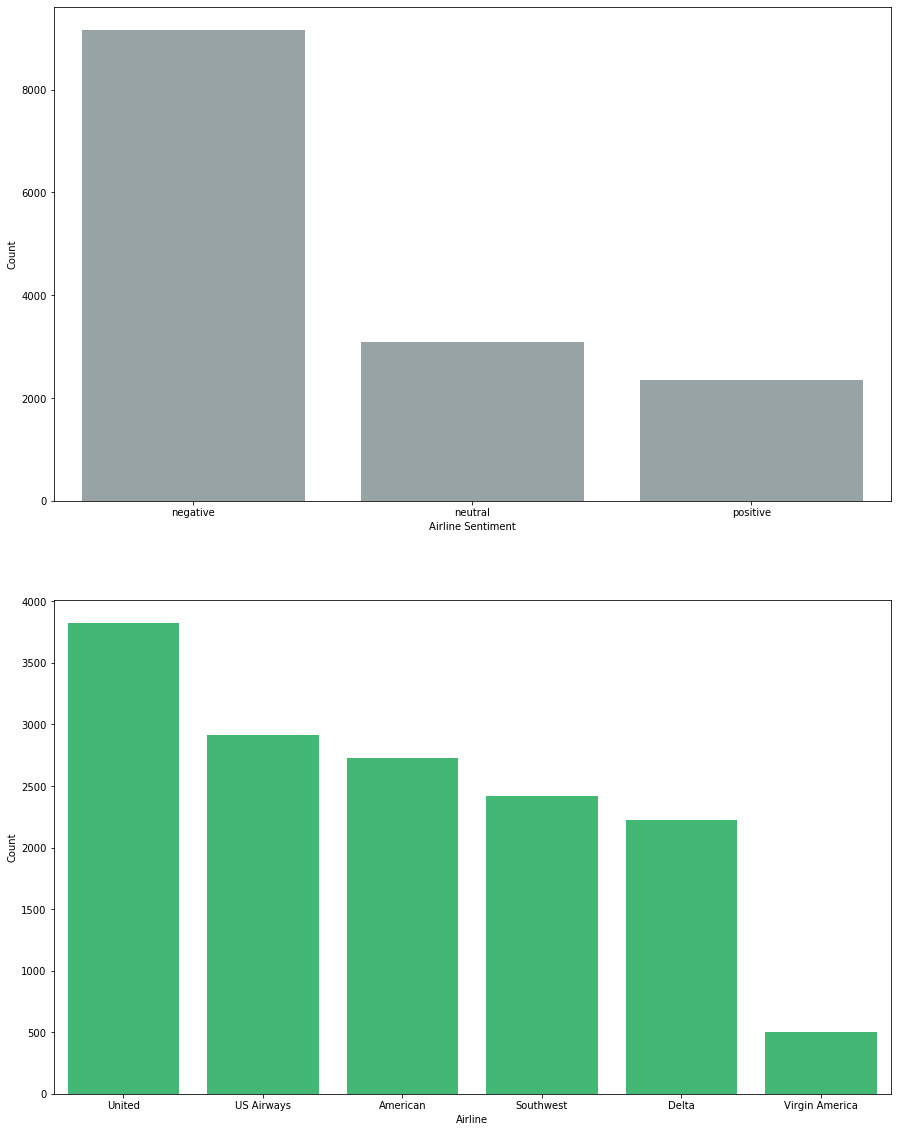

In [14]:
fig, ax =plt.subplots(2,1)
sns.countplot(df['airline_sentiment'], ax=ax[0], color='#95a5a6', order=df['airline_sentiment'].value_counts().index)
sns.countplot(df['airline'], ax=ax[1], color='#2ecc71', order=df['airline'].value_counts().index)
ax[0].set_xlabel('Airline Sentiment')
ax[1].set_xlabel('Airline')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Count')
fig.set_size_inches(15, 20)
fig.show()


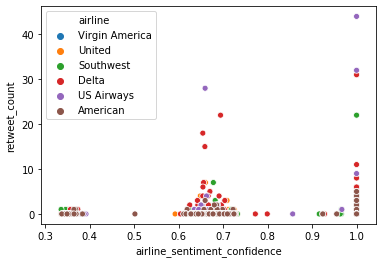

In [15]:
sns.scatterplot(x ="airline_sentiment_confidence", y = "retweet_count", hue = "airline", data = df )

In [16]:
df.retweet_count.unique()

array([ 0,  1,  2,  3,  4,  5,  7, 22,  6, 18, 15, 31, 11,  8,  9, 28, 32,
       44], dtype=int64)

In [17]:
df.index = pd.to_datetime(df.index)

Text(0, 0.5, 'Tweet Count')

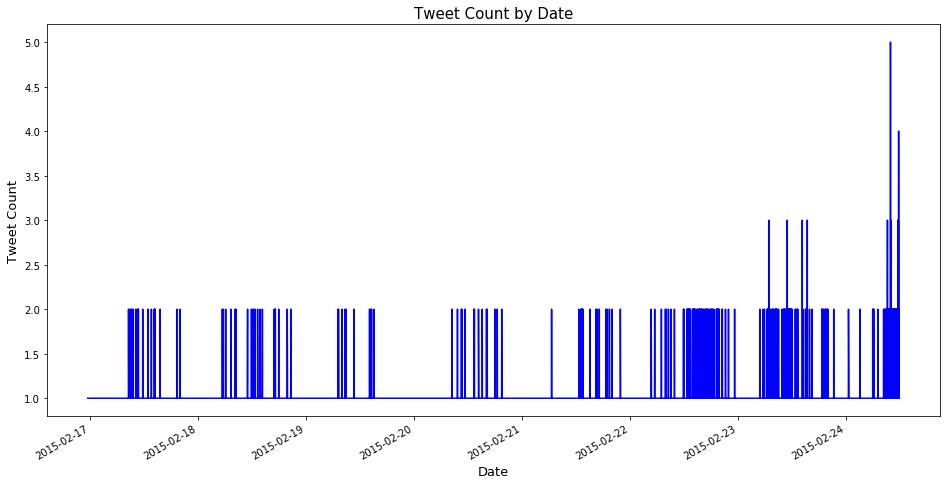

In [18]:
tweet_trend = pd.DataFrame(df.index.value_counts())
tweet_trend.columns = ['tweet_count']
tweet_trend.sort_index(ascending = True, inplace = True)
tweet_trend['tweet_count'].plot(linestyle = "-", figsize = (16,8), color = 'blue')
plt.title('Tweet Count by Date', fontsize = 15)
plt.xlabel('Date', fontsize = 13)
plt.ylabel('Tweet Count', fontsize = 13)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0F254C30>,
      dtype=object)

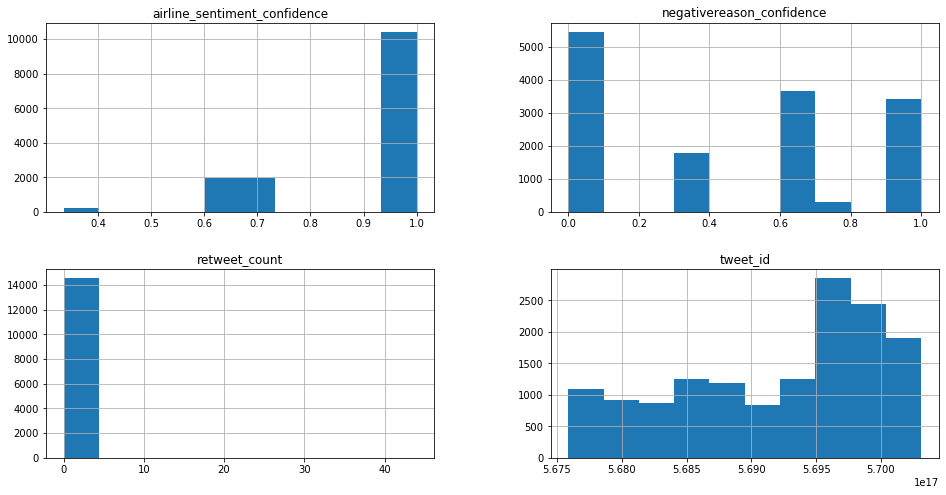

In [19]:
df.hist(figsize = (16,8))

In [20]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords

In [21]:
ps = PorterStemmer()
lm = WordNetLemmatizer()

In [22]:
import re

corpus = []

for i in range(0,len(df)):
    message = re.sub("[^a-zA-Z]"," ",df['text'][i])
    message = message.lower()
    message = message.split()
    
    message = [ps.stem(word) for word in message if not word in stopwords.words("english")]
    joint_words = " ".join(message)
    corpus.append(joint_words)

In [23]:
df['Text'] = corpus
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_location,user_timezone,Text
tweet_created,,,,,,,,,,,,,,,
2015-02-24 11:35:52-08:00,570306133677760513,neutral,1.0000,No News,0.0000,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,NaN,Eastern Time (US & Canada),virginamerica dhepburn said
2015-02-24 11:15:59-08:00,570301130888122368,positive,0.3486,No News,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,NaN,Pacific Time (US & Canada),virginamerica plu ad commerci experi tacki
2015-02-24 11:15:48-08:00,570301083672813571,neutral,0.6837,No News,0.0000,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,Lets Play,Central Time (US & Canada),virginamerica today must mean need take anoth ...
2015-02-24 11:15:36-08:00,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,NaN,Pacific Time (US & Canada),virginamerica realli aggress blast obnoxi ente...
2015-02-24 11:14:45-08:00,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,NaN,Pacific Time (US & Canada),virginamerica realli big bad thing


In [24]:
df['tokens'] = df.Text.str.split()
df.head(1)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_location,user_timezone,Text,tokens
tweet_created,,,,,,,,,,,,,,,,
2015-02-24 11:35:52-08:00,570306133677760513,neutral,1.0,No News,0.0,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,NaN,Eastern Time (US & Canada),virginamerica dhepburn said,"[virginamerica, dhepburn, said]"


In [25]:
total_words = [word for tokens in df['tokens'] for word in tokens]
unique_words = set(total_words)
len_words = [len(tokens) for tokens in df['tokens']]

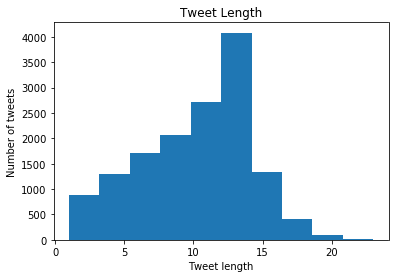

In [26]:
plt.hist(len_words)
plt.xlabel("Tweet length")
plt.ylabel("Number of tweets")
plt.title("Tweet Length")
plt.show()

# FEATURE ENGINEERING

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
X = df.Text.values

In [29]:
cvec = CountVectorizer()
x = cvec.fit_transform(X)

In [31]:
Y = df['airline_sentiment']

In [32]:
Y

tweet_created
2015-02-24 11:35:52-08:00     neutral
2015-02-24 11:15:59-08:00    positive
2015-02-24 11:15:48-08:00     neutral
2015-02-24 11:15:36-08:00    negative
2015-02-24 11:14:45-08:00    negative
                               ...   
2015-02-22 12:01:01-08:00    positive
2015-02-22 11:59:46-08:00    negative
2015-02-22 11:59:15-08:00     neutral
2015-02-22 11:59:02-08:00    negative
2015-02-22 11:58:51-08:00     neutral
Name: airline_sentiment, Length: 14604, dtype: object

In [33]:
y = LabelEncoder()
y = y.fit_transform(Y)

In [34]:
y

array([1, 2, 1, ..., 1, 0, 1])

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# MODEL GENERATION

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [47]:
mnb = MultinomialNB().fit(x_train,y_train)

In [50]:
result_mnb = mnb.predict(x_test)

In [49]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr = LogisticRegression().fit(x_train,y_train)
lr.fit(x_train, y_train)
result_lr = lr.predict(x_test)

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_L

In [71]:
results = pd.DataFrame({"Actual" : y_test,
                        "LogisticRegression" : result_lr,
                        "MultinomialNB" : result_mnb,})

In [72]:
results.head()

,Actual,LogisticRegression,MultinomialNB
0,1,1,1
1,0,2,2
2,0,0,0
3,0,0,0
4,0,0,0


In [84]:
def map_reviews(data_val):
    if data_val == 0:
         return "Neutral"
    elif data_val == 1:
         return "Positive"
    elif data_val == 2:
         return  "Negative"

In [85]:
results['logisticregression'] = results['LogisticRegression'].apply(lambda x : map_reviews(x))

In [86]:
results.head()

,Actual,LogisticRegression,MultinomialNB,logisticregression
0,1,1,1,Positive
1,0,2,2,Negative
2,0,0,0,Neutral
3,0,0,0,Neutral
4,0,0,0,Neutral


In [87]:
results['multinomialNB'] = results['MultinomialNB'].apply(lambda x : map_reviews(x))
results['actual'] = results['Actual'].apply(lambda x : map_reviews(x))

In [88]:
results.head()

,Actual,LogisticRegression,MultinomialNB,logisticregression,multinomialNB,actual
0,1,1,1,Positive,Positive,Positive
1,0,2,2,Negative,Negative,Neutral
2,0,0,0,Neutral,Neutral,Neutral
3,0,0,0,Neutral,Neutral,Neutral
4,0,0,0,Neutral,Neutral,Neutral


In [95]:
results.drop("Actual", axis =1, inplace = True)
results.drop("LogisticRegression", axis =1, inplace = True)
results.drop("MultinomialNB", axis =1, inplace = True)

In [96]:
results.head()

,logisticregression,multinomialNB,actual
0,Positive,Positive,Positive
1,Negative,Negative,Neutral
2,Neutral,Neutral,Neutral
3,Neutral,Neutral,Neutral
4,Neutral,Neutral,Neutral


# Accuracy of predictions

In [107]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [104]:
cm_log = confusion_matrix(y_test, result_lr)
print(cm_log)

[[1662  162   56]
 [ 196  324   62]
 [  88   65  306]]


In [106]:
cm_mnb = confusion_matrix(y_test, result_mnb)
print(cm_mnb)

[[1756   95   29]
 [ 306  232   44]
 [ 167   40  252]]


In [108]:
accuracy_score_log = accuracy_score(y_test, result_lr)

In [109]:
accuracy_score_mnb = accuracy_score(y_test, result_mnb)

In [110]:
print(accuracy_score_mnb)

0.7668606641561109


In [111]:
print(accuracy_score_log)

0.7846627867168778
